In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def load(path):
    img=cv.imread(path)
    #opencv reads the image in BGR, thus we have to turn it to RGB
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return img

In [3]:
def display(img1,cmap="gray"):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot()
    ax.imshow(img1,cmap="gray")

this is our initial image


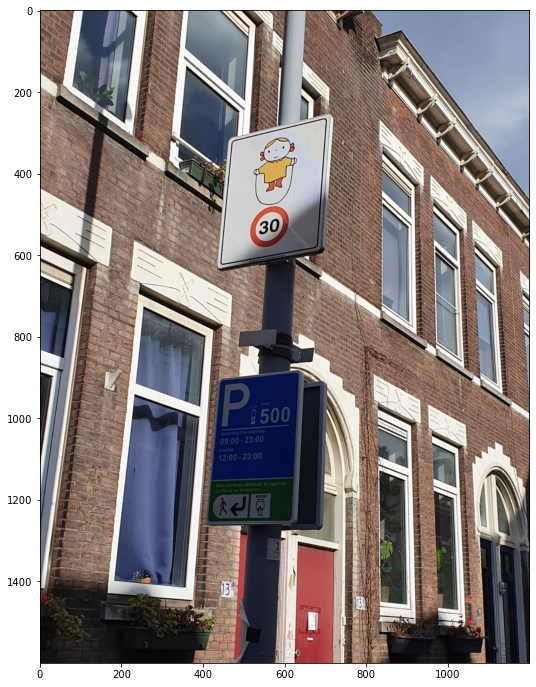

In [4]:
path="/Users/mehradhq/Downloads/drive-download-20220511T112708Z-001/4.jpeg"
img=load(path)
print ("this is our initial image")
display(img)

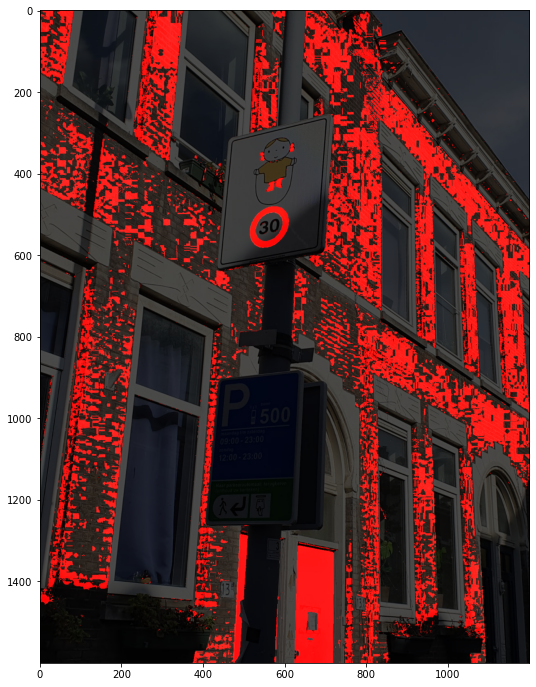

In [5]:
#masking
#In masking we first convert our image to HSV. Then given that the red channel in HSV contains hues from 0-10 and 170-180 we create the two masks using these ranges.
#We get our ultimate mask by combining these two masks.
img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = [0,0,0]
output_img[np.where(mask!=0)] = [255,0,0]

#plt.imshow(output_img)
#use blending for each image to get the red parts with a more emphasis in the initial image.
blended=cv.addWeighted(output_img,0.9,img,0.3,0)
display(blended)

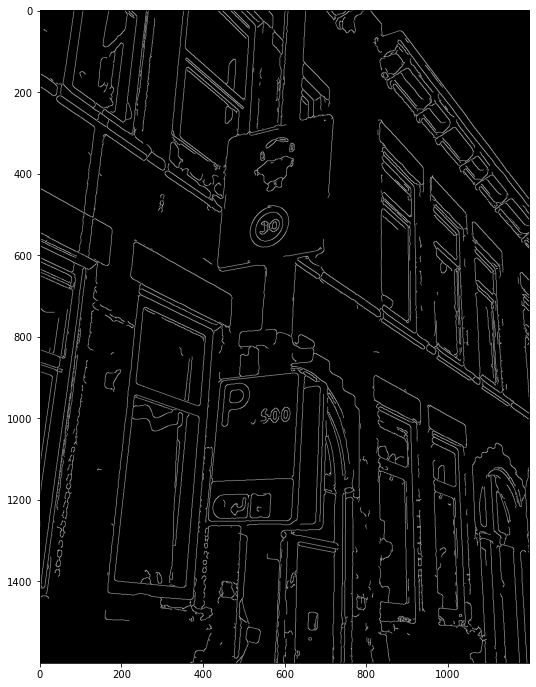

In [6]:
#median_blur
img_blur=cv.medianBlur(img,11)
#canny
med_val=np.median(img_blur)
lower=int(max(0,0.7*med_val))
upper=int(min(255,1.3*med_val))
edges=cv.Canny(img_blur,lower,upper)
display(edges)

In [7]:
#inorder to blend to images the shapes must be equal so because our initial image has 3 channels, our edges must have 3 channels as well.
edges=cv.cvtColor(edges,cv.COLOR_GRAY2RGB)

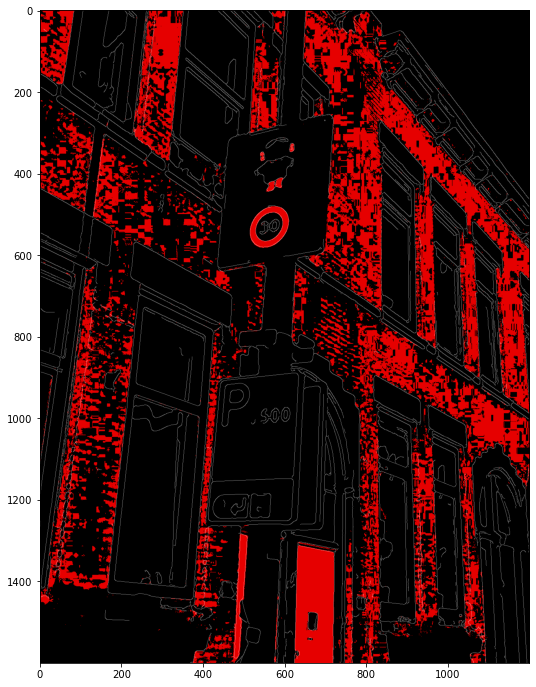

In [8]:
#masking
#In masking we first convert our image to HSV. Then given that the red channel in HSV contains hues from 0-10 and 170-180 we create the two masks using these ranges.
#We get our ultimate mask by combining these two masks.
img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = [0,0,0]
output_img[np.where(mask!=0)] = [255,0,0]

#plt.imshow(output_img)
#use blending for each image to get the red parts with a more emphasis in the initial image.
final_blend=cv.addWeighted(output_img,0.9,edges,0.5,0)
display(final_blend)